# IMPORTING DATASET

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import metrics
file = pd.read_excel(r'E:\EDAI\datasciencefinaldocs\forpaper1only.xlsx')
file.head()

,CROP,TS,VS,XP,XL,XF,ST,WSC,NDF,ADF,ADL,YB,YM
0,Barley,91.2,86.0,7.7,2.0,22.3,8.4,13.5,50.2,28.2,2.5,663,337
1,Barley,90.6,86.3,7.3,1.8,17.5,11.4,18.1,43.2,22.3,1.8,617,311
2,Clover,92.0,81.9,12.5,3.0,21.5,NaN,14.1,47.9,28.5,2.4,619,323
3,Clover,88.9,79.4,14.9,3.4,19.4,NaN,13.4,45.1,26.3,1.9,713,370
4,Clover,88.0,80.0,20.1,2.5,13.3,13.4,8.3,32.5,20.6,4.2,531,280


# ANALYZING THE DATA

In [25]:
len(file)

41

In [26]:
file.shape

(41, 13)

In [27]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CROP    41 non-null     object 
 1   TS      41 non-null     float64
 2    VS     41 non-null     float64
 3    XP     41 non-null     float64
 4    XL     41 non-null     float64
 5    XF     41 non-null     float64
 6    ST     34 non-null     float64
 7    WSC    41 non-null     float64
 8    NDF    41 non-null     float64
 9    ADF    41 non-null     float64
 10   ADL    41 non-null     float64
 11   YB     41 non-null     int64  
 12   YM     41 non-null     int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 4.3+ KB


In [28]:
file.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

# CLEANING THE DATASET

In [29]:
NewFile = file.drop(['CROP'],axis=1)
NewFile.head()

,TS,VS,XP,XL,XF,ST,WSC,NDF,ADF,ADL,YB,YM
0,91.2,86.0,7.7,2.0,22.3,8.4,13.5,50.2,28.2,2.5,663,337
1,90.6,86.3,7.3,1.8,17.5,11.4,18.1,43.2,22.3,1.8,617,311
2,92.0,81.9,12.5,3.0,21.5,NaN,14.1,47.9,28.5,2.4,619,323
3,88.9,79.4,14.9,3.4,19.4,NaN,13.4,45.1,26.3,1.9,713,370
4,88.0,80.0,20.1,2.5,13.3,13.4,8.3,32.5,20.6,4.2,531,280


In [30]:
NewFile.describe()

,TS,VS,XP,XL,XF,ST,WSC,NDF,ADF,ADL,YB,YM
count,41.000000,41.000000,41.000000,41.000000,41.000000,34.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,90.992683,85.004878,9.317073,2.846341,22.021951,13.155882,10.900000,48.221951,30.524390,3.951220,609.829268,311.170732
std,1.305831,2.497694,2.858138,2.483052,7.061852,16.611828,11.028373,13.624069,9.877216,2.472562,111.717927,54.839722
min,88.000000,79.400000,3.900000,0.100000,3.800000,0.500000,1.500000,8.300000,5.600000,0.100000,339.000000,177.000000
25%,90.200000,83.600000,7.600000,1.700000,19.000000,4.425000,5.800000,43.200000,26.600000,2.400000,531.000000,281.000000
50%,91.100000,85.500000,8.500000,2.400000,22.700000,6.250000,9.000000,50.200000,32.100000,3.500000,630.000000,327.000000
75%,91.500000,86.700000,10.300000,3.200000,27.100000,13.250000,13.400000,57.600000,36.600000,5.100000,700.000000,351.000000
max,94.400000,88.800000,20.100000,13.300000,32.800000,70.900000,72.800000,66.700000,49.200000,10.800000,799.000000,401.000000


In [31]:
NewFile.fillna(NewFile.mean(),inplace=True)

In [32]:
NewFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TS      41 non-null     float64
 1    VS     41 non-null     float64
 2    XP     41 non-null     float64
 3    XL     41 non-null     float64
 4    XF     41 non-null     float64
 5    ST     41 non-null     float64
 6    WSC    41 non-null     float64
 7    NDF    41 non-null     float64
 8    ADF    41 non-null     float64
 9    ADL    41 non-null     float64
 10   YB     41 non-null     int64  
 11   YM     41 non-null     int64  
dtypes: float64(10), int64(2)
memory usage: 4.0 KB


# VISUALIZATION  OF DATASET

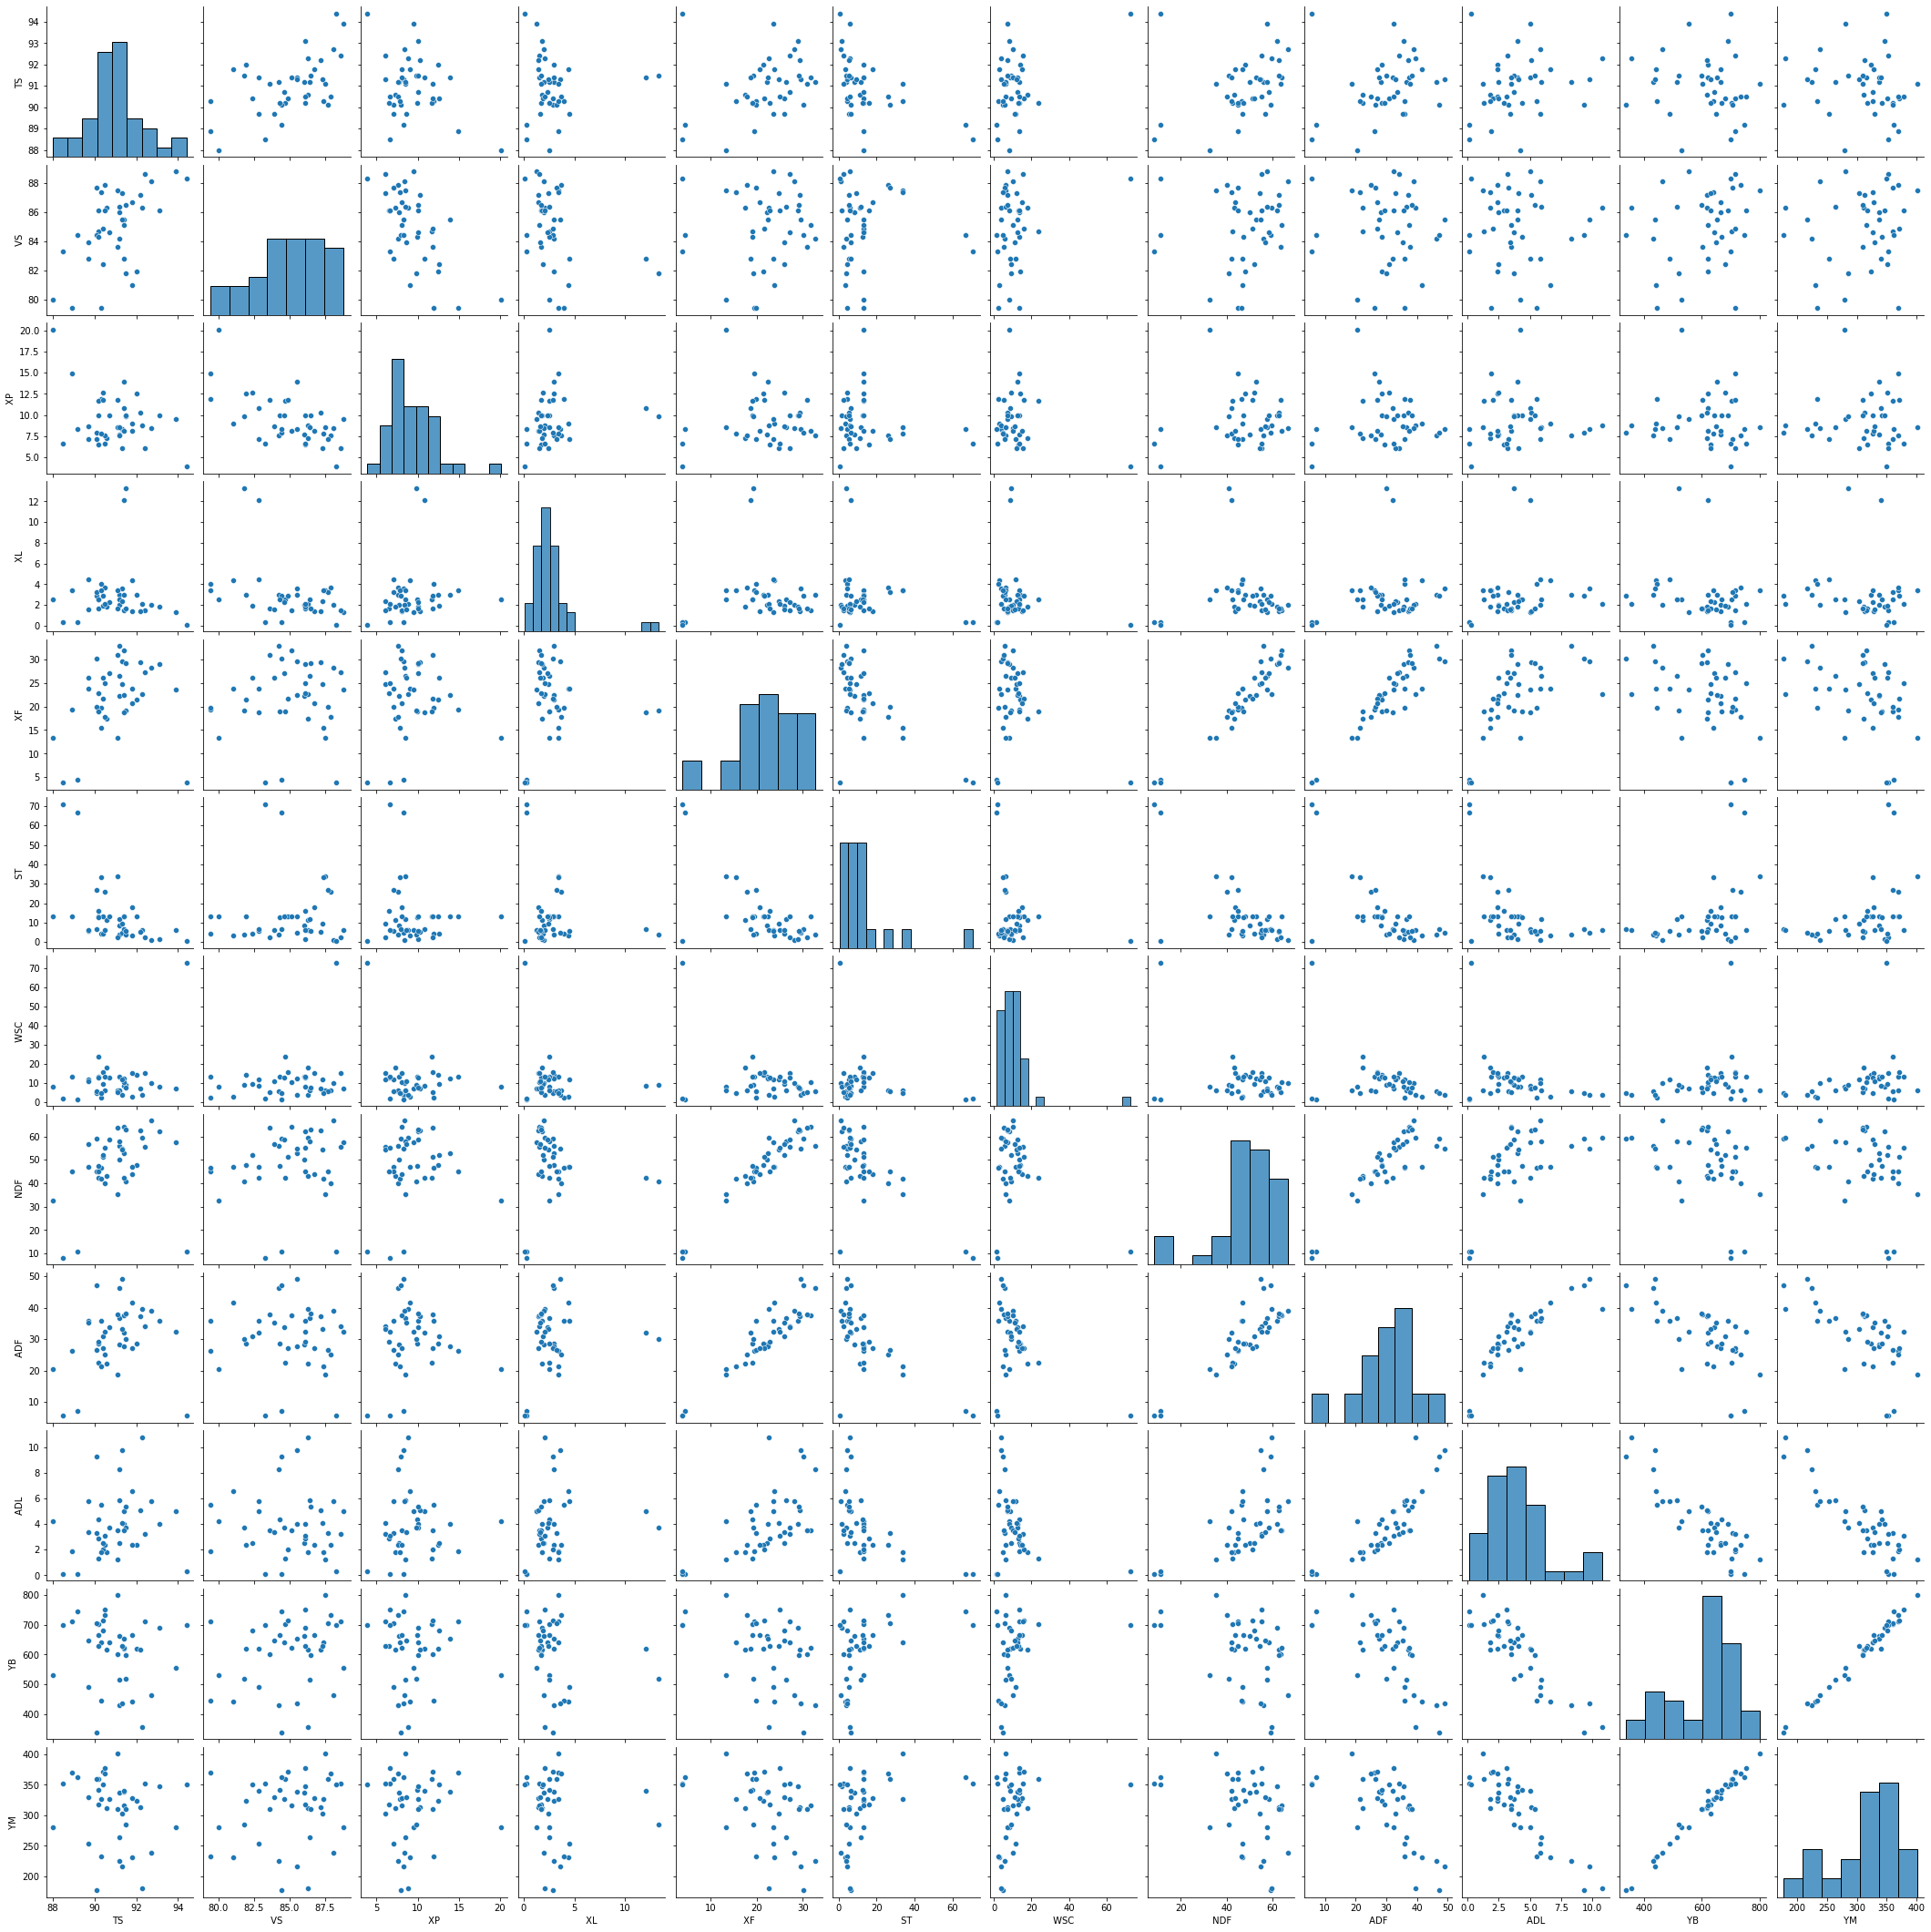

In [33]:
sns.pairplot(NewFile)

In [34]:
NewFile.corr()

,TS,VS,XP,XL,XF,ST,WSC,NDF,ADF,ADL,YB,YM
TS,1.000000,0.535797,-0.330464,-0.021867,0.272151,-0.505705,0.383250,0.320752,0.246797,0.210185,-0.131277,-0.151669
VS,0.535797,1.000000,-0.622845,-0.368835,0.080047,0.024930,0.230183,0.154947,-0.054301,-0.058739,0.248572,0.175138
XP,-0.330464,-0.622845,1.000000,0.168022,0.034799,-0.127000,-0.232832,0.105314,0.027579,0.017986,-0.056621,0.019296
XL,-0.021867,-0.368835,0.168022,1.000000,0.009664,-0.206872,-0.180470,-0.000836,0.180509,0.185124,-0.214092,-0.118349
XF,0.272151,0.080047,0.034799,0.009664,1.000000,-0.673324,-0.328454,0.950480,0.921593,0.615324,-0.416778,-0.410983
ST,-0.505705,0.024930,-0.127000,-0.206872,-0.673324,1.000000,-0.248544,-0.685288,-0.684189,-0.510628,0.425770,0.390689
WSC,0.383250,0.230183,-0.232832,-0.180470,-0.328454,-0.248544,1.000000,-0.327591,-0.410830,-0.372144,0.286117,0.279220
NDF,0.320752,0.154947,0.105314,-0.000836,0.950480,-0.685288,-0.327591,1.000000,0.867738,0.582145,-0.372871,-0.362849
ADF,0.246797,-0.054301,0.027579,0.180509,0.921593,-0.684189,-0.410830,0.867738,1.000000,0.837992,-0.666641,-0.656374
ADL,0.210185,-0.058739,0.017986,0.185124,0.615324,-0.510628,-0.372144,0.582145,0.837992,1.000000,-0.869661,-0.869496


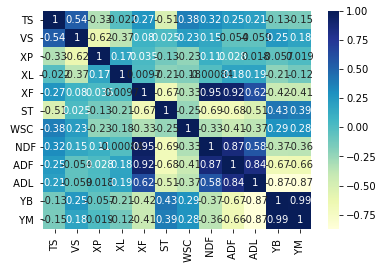

In [35]:
NewFile.corr()
dataplot = sns.heatmap(NewFile.corr(), cmap="YlGnBu", annot=True)

# SEPERATING THE DATASET IN TRAIN AND TEST DATA

In [36]:
x = NewFile[[ ' XL ',' XF ',' NDF',' ADF ',' ADL ']]
x.head()


,XL,XF,NDF,ADF,ADL
0,2.0,22.3,50.2,28.2,2.5
1,1.8,17.5,43.2,22.3,1.8
2,3.0,21.5,47.9,28.5,2.4
3,3.4,19.4,45.1,26.3,1.9
4,2.5,13.3,32.5,20.6,4.2


In [37]:
y = NewFile[' YM ']
y.head()

0    337
1    311
2    323
3    370
4    280
Name:  YM , dtype: int64

# Standardizing the features

In [38]:
final_x = pd.DataFrame(x, columns = [' XL ',' XF ',' NDF',' ADF ',' ADL '])

print(final_x)
print(type(final_x))

     XL    XF    NDF   ADF    ADL 
0    2.0  22.3  50.2   28.2    2.5
1    1.8  17.5  43.2   22.3    1.8
2    3.0  21.5  47.9   28.5    2.4
3    3.4  19.4  45.1   26.3    1.9
4    2.5  13.3  32.5   20.6    4.2
5    4.4  23.8  47.0   41.7    6.6
6    4.0  19.8  46.7   36.0    5.5
7    2.5  19.0  42.5   22.4    1.3
8    3.0  32.8  55.9   46.3    8.3
9    3.0  22.4  52.8   27.8    4.0
10   1.3  23.6  57.6   32.5    5.0
11   3.6  29.5  54.7   49.2    9.8
12   2.9  30.2  59.1   47.3    9.3
13   2.9  21.6  51.3   27.2    2.0
14   2.1  22.7  59.5   39.7   10.8
15   4.5  23.7  47.1   35.9    5.8
16   3.7  17.8  40.0   25.1    2.4
17   3.4  13.3  35.5   18.7    1.2
18   3.2  19.9  45.0   26.6    3.3
19   3.4  15.4  42.1   21.3    1.8
20   2.5  26.4  57.7   36.6    5.9
21   1.4  20.7  43.8   27.2    2.4
22   2.0  28.2  66.7   39.1    5.8
23   2.5  19.0  47.2   28.7    4.4
24   0.3   4.5  10.9    7.1    0.1
25   0.3   3.8   8.3    5.8    0.1
26   1.7  22.9  45.1   29.3    2.9
27   1.8  28.9  62.0

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.232629,-3.461036
1,10.054616,-4.174139
2,1.652208,-1.749127
3,5.770303,-1.861620
4,20.388502,1.419057
5,-5.891168,10.042330
6,-1.018978,5.620477
7,9.988944,-3.699108
8,-18.638787,8.654094
9,-2.168760,-4.433771


In [40]:
#Calculate the variance explained by priciple components
pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
total_var =round(sum(list(pca.explained_variance_ratio_))*100,2 )
total_var

[0.91684255 0.05746435]


97.43

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print("Shape of original dataset : ", NewFile.shape)

print("Shape of input,output-training set : ", x_train.shape + y_train.shape)
print("Shape of input-testing set : ", x_test.shape + y_test.shape)

Shape of original dataset :  (41, 12)
Shape of input,output-training set :  (28, 5, 28)
Shape of input-testing set :  (13, 5, 13)


In [44]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
pred = regr.predict(x_test)

In [45]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(metrics.mean_squared_error(y_test ,pred)))

26.491680923239063


In [46]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test,pred))

r2_score 0.8262914767944249


In [75]:
print(regr.coef_)


[  3.09639411   5.56944132   0.26291488  -4.14294147 -15.91476198]


In [74]:
# Equation of MLR
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ ')
print('                                                                ')
Ym = 'Ym =  3.09639411 XL + 5.56944132 XF +  0.26291488 NDF -  4.14294147  ADF - 15.91476198 ADL'

print(Ym)
print('                                                                ')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ ')

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
                                                                
Ym =  3.09639411 XL + 5.56944132 XF +  0.26291488 NDF -  4.14294147  ADF - 15.91476198 ADL
                                                                
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 


NameError: name 'LinearRegression' is not defined

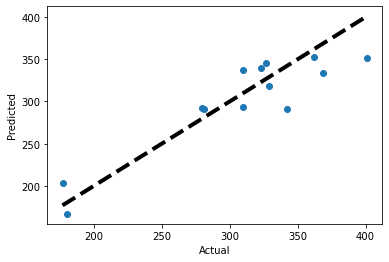

In [55]:
from sklearn import linear_model

fig, ax = plt.subplots()
ax.scatter(y_test, pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
#y_test, pred = y_test.reshape(-1,1), pred.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, pred).predict(y_test))

plt.show()